In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

In [2]:
country = pd.read_csv('D:/dataincub/WDICountry.csv')
#country.head()
country['Income Group'].value_counts(dropna=False)

High income            79
Upper middle income    60
Lower middle income    47
NaN                    46
Low income             31
Name: Income Group, dtype: int64

In [3]:
country.shape

(263, 31)

In [4]:
text = country['Special Notes'].fillna('0')
text[text.str.contains('aggregate')].head()

5     Arab World aggregate. Arab World is composed o...
34            Central Europe and the Baltics aggregate.
59    East Asia and Pacific regional aggregate (does...
61    East Asia and Pacific regional aggregate (incl...
62    Europe and Central Asia regional aggregate (do...
Name: Special Notes, dtype: object

In [5]:
metrics = pd.read_csv('D:/dataincub/WDISeries.csv')
metrics.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN


In [6]:
metrics[metrics['Indicator Name'].str.contains('Life expectancy')]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
1242,SP.DYN.LE00.FE.IN,Health: Mortality,"Life expectancy at birth, female (years)",NaN,Life expectancy at birth indicates the number ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,(1) United Nations Population Division. World ...,Life expectancy at birth used here is the aver...,Mortality rates for different age groups (infa...,NaN,NaN,NaN,CC BY-4.0,NaN
1243,SP.DYN.LE00.IN,Health: Mortality,"Life expectancy at birth, total (years)",NaN,Life expectancy at birth indicates the number ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,(1) United Nations Population Division. World ...,Life expectancy at birth used here is the aver...,Mortality rates for different age groups (infa...,NaN,NaN,NaN,CC BY-4.0,NaN
1244,SP.DYN.LE00.MA.IN,Health: Mortality,"Life expectancy at birth, male (years)",NaN,Life expectancy at birth indicates the number ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,(1) United Nations Population Division. World ...,Life expectancy at birth used here is the aver...,Mortality rates for different age groups (infa...,NaN,NaN,NaN,CC BY-4.0,NaN


In [7]:
splitTopics = metrics.Topic.str.partition(':')
splitTopics.groupby([0,2]).size()
# splitTopics.groupby([0,2]).size()

0                                           2                                                              
Economic Policy & Debt                       Balance of payments: Capital & financial account                  11
                                             Balance of payments: Current account: Balances                     4
                                             Balance of payments: Current account: Goods, services & income    22
                                             Balance of payments: Current account: Transfers                    7
                                             Balance of payments: Reserves & other items                        6
                                                                                                               ..
Social Protection & Labor                    Labor force structure                                             28
                                             Migration                                        

In [8]:
df = pd.read_csv('D:/dataincub/WDIData.csv')
# sanitationdata = pd.read_csv('D:/dataincub/basicsanitation.csv')
# healthexp = pd.read_csv('D:/dataincub/healthexp.csv')
# df = pd.concat([healthexp, sanitationdata, df], ignore_index=True)


df = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Value')
temp = df[df['Indicator Name'].str.contains('GDP per capita')].groupby(['Country Name','Indicator Name'])
temp.size().unstack()
#check availability of data and how missing values are handled (confirm unavailable data reported as'NaN')
#df[df['Indicator Name'].str.contains('GDP per capita')].groupby(['Country Name', 'Indicator Name']).size().unstack()

Indicator Name,GDP per capita (constant 2010 US$),GDP per capita (constant LCU),GDP per capita (current LCU),GDP per capita (current US$),GDP per capita growth (annual %),"GDP per capita, PPP (constant 2011 international $)","GDP per capita, PPP (current international $)","Government expenditure per student, primary (% of GDP per capita)","Government expenditure per student, secondary (% of GDP per capita)","Government expenditure per student, tertiary (% of GDP per capita)"
Country Name,,,,,,,,,,
Afghanistan,60,60,60,60,60,60,60,60,60,60
Albania,60,60,60,60,60,60,60,60,60,60
Algeria,60,60,60,60,60,60,60,60,60,60
American Samoa,60,60,60,60,60,60,60,60,60,60
Andorra,60,60,60,60,60,60,60,60,60,60
...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,60,60,60,60,60,60,60,60,60,60
World,60,60,60,60,60,60,60,60,60,60
"Yemen, Rep.",60,60,60,60,60,60,60,60,60,60


In [9]:
df['Indicator Code'].value_counts().shape

(1431,)

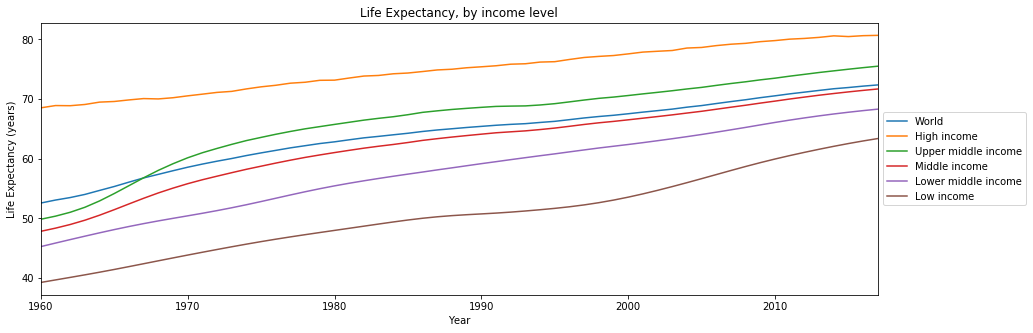

In [10]:
income = country[['Country Code','Income Group', 'Special Notes']]
df_Le = df.merge(income, left_on=df['Country Code'], right_on = income['Country Code'], how='outer')
df_Le = df_Le[(df_Le['Indicator Name'] =='Life expectancy at birth, total (years)')]

df_Le = pd.pivot_table(df_Le, values = 'Value', index='Year', columns='Country Name')

income_grps = ['World', 'High income', 'Upper middle income', 'Middle income', 'Lower middle income', 'Low income']

df_Le[income_grps].plot(figsize=(15,5))
plt.title('Life Expectancy, by income level')
plt.ylabel('Life Expectancy (years)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

C:\Users\Anand\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Anand\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


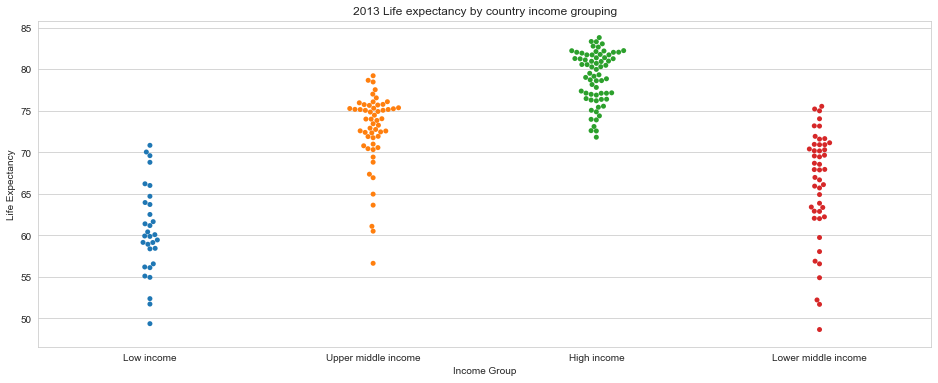

In [11]:
# Plot 2013 life expectancy for all countries, by income grouping
df_2013 = df.merge(income, left_on=df['Country Code'], right_on = income['Country Code'], how='outer')

df_2013 = df_2013[(df_2013['Indicator Name'] =='Life expectancy at birth, total (years)') & (df_2013['Year'] == '2013')]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))
_ = sns.swarmplot(x='Income Group', y = 'Value', data = df_2013)
_ = plt.xlabel('Income Group')
_ = plt.ylabel('Life Expectancy')
_ = plt.title('2013 Life expectancy by country income grouping')

plt.show()

In [12]:
# df_2013.groupby(['Income Group']).describe().unstack()[['Value']].round(1)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,1960,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,1960,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1960,NaN


In [15]:
columns = {
            "SP.DYN.LE00.IN": "LifeExpectancy",
            "SH.XPD.CHEX.PC.CD": "HealthSpend",
            'SP.ADO.TFRT': 'Adolescent_fertility',
            'NY.GDP.PCAP.CD': 'GDP',
            'SH.STA.BASS.ZS': 'Sanitation',
            'SP.RUR.TOTL.ZS': 'Rural_pop%',
            "NY.ADJ.AEDU.GN.ZS": "EduExp_percentGNI",
            'NY.ADJ.NNTY.KD.ZG': 'National_income_%growth',
            'AG.LND.AGRI.ZS': 'Agricultural_land_%',
            'AG.LND.ARBL.ZS': 'Arable_land_%',
            'MS.MIL.TOTL.TF.ZS': 'Armed_forces_%',
            'SL.EMP.1524.SP.ZS': 'Employment_ratio_15',
            'SE.PRM.ENRR': 'Primary_edu',
            'SE.PRM.ENRL': 'Secondary_edu',
            'SH.XPD.CHEX.GD.ZS': 'Health_exp_%',
            'NE.IMP.GNFS.ZS': 'Imports_%GDP',
            'NV.IND.TOTL.ZS': 'Industry_%GDP',
            'IT.CEL.SETS.P2': 'Mobile_phones_per100',
            'EN.POP.DNST': 'Population_density',
            'SM.POP.REFG': 'Refugee_population',
            'NE.TRD.GNFS.ZS': 'Trade_%GDP',
            'SL.UEM.TOTL.ZS': 'Unemployment_%',
            #'SH.MMR.RISK': 'Maternal_death_perc',
            #'SP.DYN.IMRT.IN': 'Mortality_infant _per1000',
            #'SH.DYN.NMRT': 'Mortality_neonatal_1000',
            #'SH.DYN.MORT': 'Mortality_sub5_1000',
            'SH.MED.SAOP.P5' : 'surgical_specialists_density'
          }

df['Indicator Code'] = df['Indicator Code'].astype(str)
df['Indicator Name'] = df['Indicator Name'].astype(str)


# Reshape the data so features are column headers, and countries are rows
pivot = df.pivot_table('Value','Country Name', 'Indicator Code')

features = list(columns.keys())
df_features = pivot[features]
df_features.columns.to_series()
df_features.columns = df_features.columns.to_series()
flattened = pd.DataFrame(df_features.to_records())
flattened.head()
df_ml = flattened.rename(index=str, columns=columns)

# Drop countries who do not have a life expectancy value 
df_ml = df_ml[pd.notnull(df_ml.LifeExpectancy)]
df_ml = df_ml.dropna(axis =0, how='any').drop('Country Name', axis = 1)

y = df_ml.LifeExpectancy.values.reshape(-1,1)
X = df_ml.drop(['LifeExpectancy'], axis = 1)

#View summary metrics of the features
X.describe().round(1)

,HealthSpend,Adolescent_fertility,GDP,Sanitation,Rural_pop%,EduExp_percentGNI,National_income_%growth,Agricultural_land_%,Arable_land_%,Armed_forces_%,...,Secondary_edu,Health_exp_%,Imports_%GDP,Industry_%GDP,Mobile_phones_per100,Population_density,Refugee_population,Trade_%GDP,Unemployment_%,surgical_specialists_density
count,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,...,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0
mean,970.0,74.8,6818.4,71.4,49.9,4.1,4.8,42.5,16.9,1.4,...,3882124.7,6.3,40.5,26.8,31.1,135.5,90522.9,75.0,7.8,40.4
std,1620.3,51.4,9146.7,31.0,22.9,1.6,6.1,21.2,14.6,1.5,...,14090100.6,2.3,21.5,9.3,15.5,444.0,233286.7,41.4,5.6,40.8
min,13.3,9.5,163.7,5.4,0.0,1.2,-4.9,1.9,0.0,0.1,...,28245.6,1.9,9.6,8.6,2.4,1.3,1.9,19.3,0.8,0.2
25%,52.8,31.4,788.4,46.1,31.9,2.9,2.7,27.3,5.7,0.6,...,354239.0,4.8,26.5,21.1,18.6,22.1,1553.6,49.2,3.9,3.0
50%,212.1,58.4,2331.4,86.0,48.3,4.1,4.1,43.3,11.7,1.0,...,809131.0,6.1,35.6,25.9,31.0,54.3,10218.9,63.7,6.8,24.3
75%,838.1,108.3,9504.1,97.7,68.7,5.0,5.4,59.3,26.0,1.7,...,2846684.2,8.0,52.5,30.3,41.7,106.3,65867.5,93.2,10.3,67.8
max,7285.2,214.9,42589.7,100.0,93.6,10.2,67.7,86.2,66.2,12.4,...,122654361.8,15.3,161.1,64.6,95.2,4895.6,1652721.1,329.2,31.9,155.9


In [16]:
df_ml.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,LifeExpectancy,HealthSpend,Adolescent_fertility,GDP,Sanitation,Rural_pop%,EduExp_percentGNI,National_income_%growth,Agricultural_land_%,Arable_land_%,Armed_forces_%,Employment_ratio_15,Primary_edu,Secondary_edu,Health_exp_%,Imports_%GDP,Industry_%GDP,Mobile_phones_per100,Population_density,Refugee_population,Trade_%GDP,Unemployment_%,surgical_specialists_density
LifeExpectancy,1.0,0.61,-0.82,0.67,0.92,-0.81,0.31,-0.19,-0.047,0.16,0.17,-0.26,0.56,-0.043,0.41,0.096,0.24,0.75,0.13,-0.071,0.22,0.16,0.72
HealthSpend,0.61,1.0,-0.52,0.93,0.48,-0.59,0.25,-0.15,-0.036,0.069,-0.065,0.15,0.19,-0.044,0.62,-0.012,-0.039,0.52,0.048,0.032,0.094,-0.066,0.49
Adolescent_fertility,-0.82,-0.52,1.0,-0.59,-0.81,0.63,-0.28,-0.014,-0.065,-0.23,-0.25,0.3,-0.48,-0.036,-0.27,-0.17,-0.33,-0.66,-0.15,0.062,-0.27,-0.19,-0.68
GDP,0.67,0.93,-0.59,1.0,0.57,-0.68,0.21,-0.096,-0.12,0.054,0.016,0.086,0.23,-0.089,0.47,0.13,0.11,0.63,0.15,-0.023,0.28,-0.082,0.53
Sanitation,0.92,0.48,-0.81,0.57,1.0,-0.76,0.31,-0.12,-0.046,0.13,0.19,-0.37,0.55,-0.074,0.35,0.095,0.35,0.74,0.12,-0.074,0.23,0.22,0.68
Rural_pop%,-0.81,-0.59,0.63,-0.68,-0.76,1.0,-0.25,0.15,0.096,0.022,-0.2,0.24,-0.43,0.13,-0.39,-0.11,-0.29,-0.69,-0.2,0.065,-0.24,-0.12,-0.61
EduExp_percentGNI,0.31,0.25,-0.28,0.21,0.31,-0.25,1.0,-0.14,0.037,-0.062,-0.13,-0.12,0.18,-0.17,0.35,0.15,0.022,0.18,-0.13,-0.17,0.17,0.22,0.27
National_income_%growth,-0.19,-0.15,-0.014,-0.096,-0.12,0.15,-0.14,1.0,-0.11,-0.11,-0.01,-0.036,0.1,0.04,-0.28,0.14,0.41,0.041,0.011,-0.0063,0.17,-0.12,-0.15
Agricultural_land_%,-0.047,-0.036,-0.065,-0.12,-0.046,0.096,0.037,-0.11,1.0,0.54,-0.042,-0.13,0.034,0.076,0.22,-0.055,-0.25,-0.1,-0.087,0.014,-0.12,0.24,0.075
Arable_land_%,0.16,0.069,-0.23,0.054,0.13,0.022,-0.062,-0.11,0.54,1.0,-0.1,-0.18,0.039,0.14,0.16,-0.053,-0.18,0.12,0.056,0.11,-0.048,-0.024,0.27


In [17]:
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
lr.score(X, y)

pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lr.coef_[0,:]})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,HealthSpend,4.801079e-04
1,Adolescent_fertility,-3.272248e-02
2,GDP,2.310952e-05
3,Sanitation,1.598756e-01
4,Rural_pop%,-8.247040e-02
5,EduExp_percentGNI,2.529554e-02
6,National_income_%growth,-1.299123e-01
7,Agricultural_land_%,-3.055948e-02
8,Arable_land_%,3.664897e-02
9,Armed_forces_%,-6.001917e-02


In [18]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols
model_ols = ols('y ~ X', df_ml).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     55.83
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           5.96e-48
Time:                        10:01:45   Log-Likelihood:                -315.71
No. Observations:                 128   AIC:                             677.4
Df Residuals:                     105   BIC:                             743.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.2468      4.560     11.457      0.000      43.205      61.289
X[0]           0.0005      0.001      0.738      0.462      -0.001       0.002
X[1]          -0.0327      0.012     -2.686      0.008      -0.057      -0.009
X[2]        2.311e-05      0.000      0.184      0.854      -0.000       0.000
X[3]           0.1599      0.022      7.124      0.000       0.115       0.204
X[4]          -0.0825      0.024     -3.389      0.001      -0.131      -0.034
X[5]           0.0253      0.216      0.117      0.907      -0.404       0.455
X[6]          -0.1299      0.059     -2.201      0.030      -0.247      -0.013
X[7]          -0.0306      0.018     -1.668      0.098      -0.067       0.006
X[8]           0.0366      0.028      1.294      0.199      -0.020       0.093
X[9]          -0.0600      0.224     -0.268      0.789      -0.504       0.384
X[10]          0.0298      0.033      0.902      0.369      -0.036       0.095
X[11]          0.0736      0.022      3.317      0.001       0.030       0.118
X[12]       1.852e-08   2.27e-08      0.815      0.417   -2.66e-08    6.36e-08
X[13]         -0.1588      0.216     -0.735      0.464      -0.587       0.270
X[14]          0.0483      0.072      0.667      0.506      -0.095       0.192
X[15]         -0.0711      0.051     -1.382      0.170      -0.173       0.031
X[16]          0.0431      0.033      1.315      0.191      -0.022       0.108
X[17]         -0.0005      0.001     -0.511      0.611      -0.002       0.001
X[18]       5.743e-08   1.33e-06      0.043      0.966   -2.58e-06    2.69e-06
X[19]         -0.0224      0.041     -0.541      0.589      -0.105       0.060
X[20]          0.0023      0.077      0.029      0.977      -0.151       0.155
X[21]          0.0150      0.012      1.293      0.199      -0.008       0.038
==============================================================================
Omnibus:                        1.647   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.227
Skew:                          -0.220   Prob(JB):                        0.541
Kurtosis:                       3.192   Cond. No.                     2.39e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X_top = df_ml.loc[:,('Rural_pop%', 'Sanitation')]
# X_top = df_ml.loc[:,('Sanitation', 'Rural_pop%', 'HealthSpend')]

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size = 0.3, random_state=42) 
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

cv_results = cross_val_score(lr, X_top, y, cv = 5)
print('Model accuracy with 5 cross validation folds: {}' .format(np.mean(cv_results)))

Model accuracy with 5 cross validation folds: 0.866298522346522


In [20]:
# The coefficients
pd.DataFrame({'features': X_top.columns, 'estimatedCoefficients': lr.coef_[0,:]})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,Rural_pop%,-0.123912
1,Sanitation,0.233695


In [21]:
lr.intercept_

array([54.00477193])

Text(0.5, 1.0, 'Evaluation of model-predicted life expectancy')

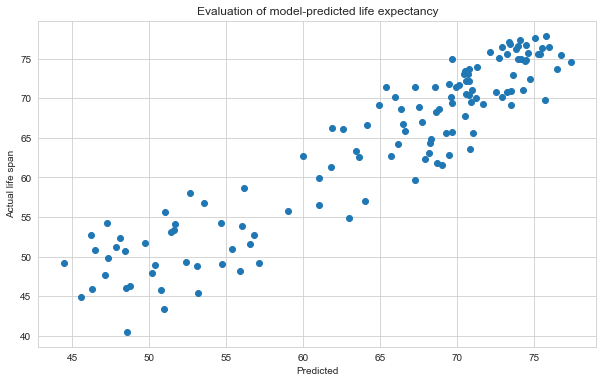

In [22]:
# scatter plot between actual and predicted life expectancy
y_predicted = lr.predict(X_top)
plt.figure(figsize=(10,6))
plt.scatter(y_predicted, y)
plt.xlabel("Predicted")
plt.ylabel("Actual life span")
plt.title('Evaluation of model-predicted life expectancy')

In [23]:
X_sani = df_ml.loc[:,('Sanitation')].values.reshape(-1,1)
X_top = df_ml.loc[:,('Sanitation', 'Rural_pop%')]

X_train, X_test, y_train, y_test = train_test_split(X_sani, y, test_size = 0.3, random_state=42) 
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)
 
cv_results = cross_val_score(lr, X_sani, y, cv = 5)
print('Model accuracy with 10 cross validation folds: {}' .format(np.mean(cv_results)))

Model accuracy with 10 cross validation folds: 0.8381405279942913


In [24]:
lr.coef_

array([[0.30441189]])

In [25]:
# Create a sub-set of columns 
columns_san = {
            'SH.STA.BASS.ZS': 'Sanitation_perc_access',
            "SP.DYN.LE00.IN": "LifeExpect_total",
            'SH.MMR.RISK': 'Maternal_death_perc',
            'SP.DYN.IMRT.IN': 'Mortality_infant _per1000',
            'SH.DYN.NMRT': 'Mortality_neonatal_1000',
            'SH.DYN.MORT': 'Mortality_sub5_1000',
          }

df.IndicatorCode = df['Indicator Code'].astype(str)
df.IndicatorName = df['Indicator Name'].astype(str)

# piovt the 2013 data so the features are column headers

C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


In [26]:
pivot_san = df[df.Year==2013].pivot_table('Value','Country Name', 'Indicator Code')

features = list(columns_san.keys())
df_features = pivot[features]
df_features.columns = df_features.columns.to_series()
flattened = pd.DataFrame(df_features.to_records())

df_ml = flattened.rename(index=str, columns=columns_san)

# Drop countries who do not have a life expectancy value 
df_ml = df_ml[pd.notnull(df_ml.LifeExpect_total)]
df_ml = df_ml.dropna(axis =0, how='any').drop('Country Name', axis = 1)

In [27]:
df_ml.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Sanitation_perc_access,LifeExpect_total,Maternal_death_perc,Mortality_infant _per1000,Mortality_neonatal_1000,Mortality_sub5_1000
Sanitation_perc_access,1.0,0.9,0.51,-0.85,-0.84,-0.86
LifeExpect_total,0.9,1.0,0.6,-0.94,-0.89,-0.94
Maternal_death_perc,0.51,0.6,1.0,-0.55,-0.55,-0.51
Mortality_infant _per1000,-0.85,-0.94,-0.55,1.0,0.94,0.98
Mortality_neonatal_1000,-0.84,-0.89,-0.55,0.94,1.0,0.93
Mortality_sub5_1000,-0.86,-0.94,-0.51,0.98,0.93,1.0
